# EDA and Prediction on Student's Exam Performance

In [ ]:
# Installing Data Science Libraries

!pip install pandas
!pip install np

!pip install matplotlib
!pip install seaborn

!pip install sklearn

In [1]:
# Importing necessary modules

# Data Preprocessing + Linear Algebra
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 Loading the Data

In [2]:
# Loading our dataset into the notebook using read_csv()
dataset = pd.read_csv("./StudentsPerformance.csv")

## 2 Exploratory Data Analysis

In [3]:
# .head() displays the first 5 rows of our DataFrame.

dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# .shape is an attribute that tells us the number of rows and columns in our dataset
# (rows, columns)

dataset.shape

(1000, 8)

In [5]:
# .info() gives us information about our dataset. Such as the number of rows, columns and etc.
# Dtype -> The data type of our column. 
# Object: Usually text data, can be lists and etc., Int64: 64-bit Integer (Whole number)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# .describe() gives us statistical descriptions of our dataset, such as the mean, median, percentiles and etc.
# By default, .describe() only gets statistical descriptions of numerical columns
# include="all" will show statistical descriptions for all columns

dataset.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


### Distribution of Math, Reading and Writing Scores:

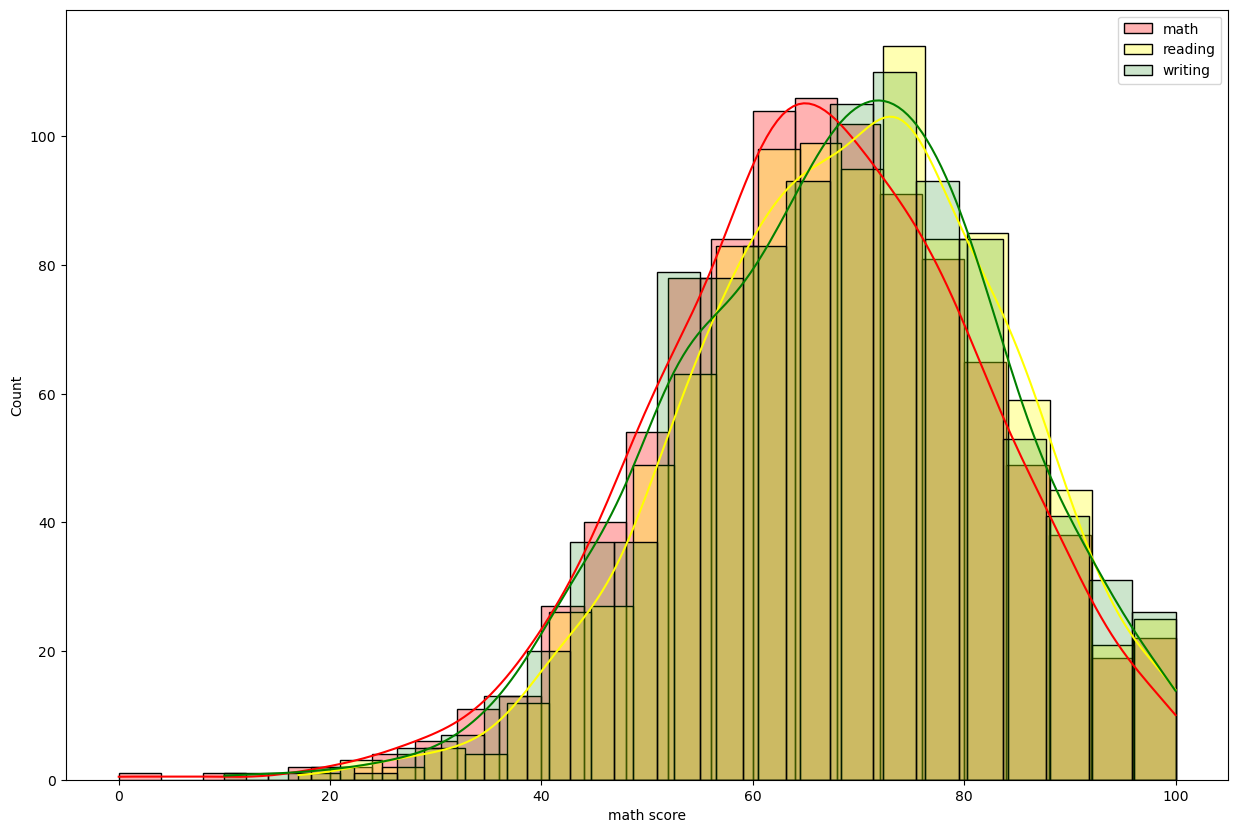

In [7]:
# Creates a figure (canvas for us to display our graph)
fig = plt.figure(figsize=(15, 10)) 

# Histplot creates a histogram from our numerical column. 
# KDE -> Kernel Density Estimate
sns.histplot(dataset["math score"], kde=True, color="red", label="math", alpha=0.3)
sns.histplot(dataset["reading score"], kde=True, color="yellow", label="reading", alpha=0.3)
sns.histplot(dataset["writing score"], kde=True, color="green", label="writing", alpha=0.2)

# Display our color legend
plt.legend()

# Ok picasso show us the canvas!
plt.show()

Students score similarly for the 3 subjects as seen from the distribution of the three histograms. Their scores are generally quite good > 60, with only a small percentage of students failing (<50%). There is a slight decrease in mean score for math.

### Score distribution between Genders (given):

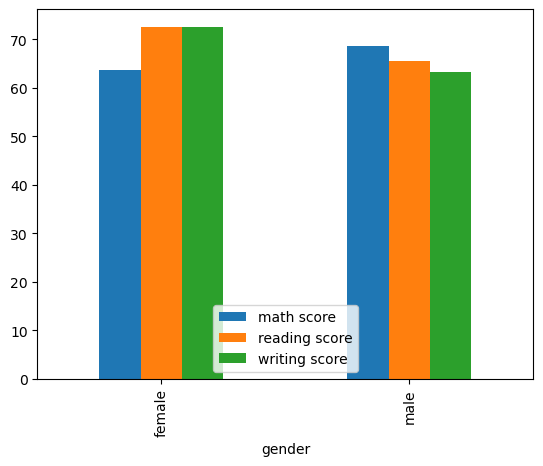

In [8]:
# For every gender, list the average of the 3 scores
data_gender = pd.DataFrame(dataset.groupby(["gender"])[["math score", "reading score", "writing score"]].mean())

# Plot the bar! 
data_gender.plot.bar()

# Michaelangelo yesssss slay
plt.show()

Based on the average results for each subject, females perform better than males in reading and writing. Males on the other hand perform better in math than females. (ACCORDING TO THE DATASET OK DON'T CANCEL ME)

### Parents Education affect student's grades?

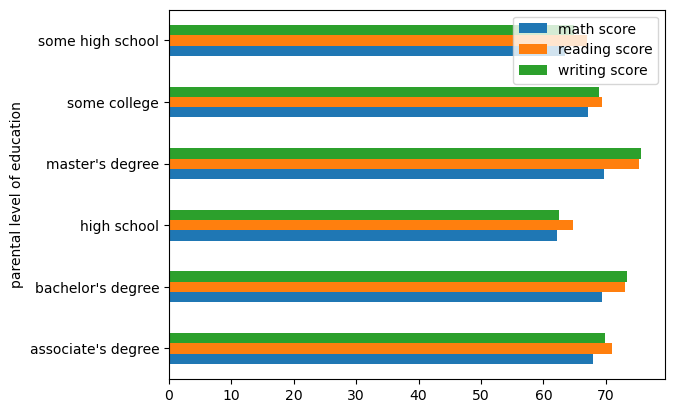

In [9]:
# Group by parental education, and get the mean of the 3 scores
dataset.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().plot.barh()

# Donatello do your thing! Idek if donatello is an artist Im just naming ninja turtles
plt.show()

Students with parents holding a master's degree generally score the highest on average for all 3 subjects. This is followed by bachelors -> associates -> college -> some high school -> high school. This tells us that in this particular dataset, higher levels of education for parents is correlated with students grades.

## Data Preparation

### Creating our dependent variable

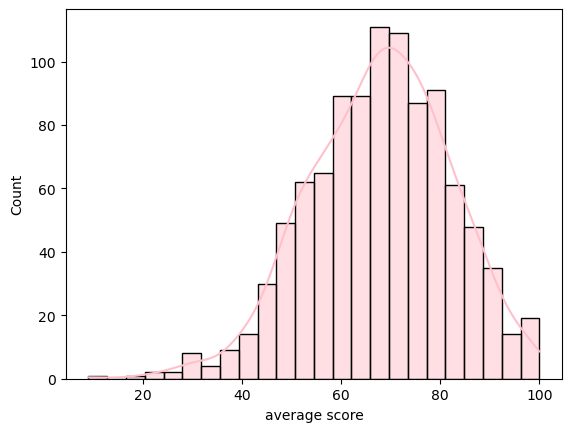

In [10]:
# Gets the average of the 3 scores, and rounds it to 2 decimal places
dataset["average score"] = round((dataset["math score"] + dataset["reading score"] + dataset["writing score"]) / 3, 2)

# Check distribution of average score
sns.histplot(dataset["average score"], kde=True, color="pink", alpha=0.5)

plt.show()

### Dropping features

In [11]:
# Because these features are what the target variable is comprised of,
# including them doesn't make sense and could potentially bias our model
dataset = dataset.drop(["math score", "reading score", "writing score"], axis=1)

### Encoding our categorical features

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

### Binary Encoding

In [12]:
# Identifying features with 2 unique categories
dataset.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
average score                  194
dtype: int64

In [13]:
# female = 1, male = 0
dataset["gender"] = dataset["gender"].apply(lambda x : 1 if x == "female" else 0)

# standard = 1, free/reduced = 0
dataset["lunch"] = dataset["lunch"].apply(lambda x : 1 if x == "standard" else 0)

# completed = 1, none = 0
dataset["test preparation course"] = dataset["test preparation course"].apply(lambda x : 1 if x == "completed" else 0)

dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average score
0,1,group B,bachelor's degree,1,0,72.67
1,1,group C,some college,1,1,82.33
2,1,group B,master's degree,1,0,92.67
3,0,group A,associate's degree,0,0,49.33
4,0,group C,some college,1,0,76.33


### One-Hot Encoding

In [14]:
# Import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# Initialize the OHE, with drop first 
ohe = OneHotEncoder(drop="first")

# Fit and transform the encoder, and convert it to a pandas DataFrame
race_features = pd.DataFrame(ohe.fit_transform(dataset[["race/ethnicity"]]).toarray(), 
                             columns=ohe.get_feature_names_out())

# Show first 5 rows of encoded columns
race_features.head()

,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [15]:
# Concatenate the two dataframes together
dataset = pd.concat([dataset.drop("race/ethnicity", axis=1), race_features], axis=1)

# Show our new dataframe!
dataset.head()

,gender,parental level of education,lunch,test preparation course,average score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,bachelor's degree,1,0,72.67,1.0,0.0,0.0,0.0
1,1,some college,1,1,82.33,0.0,1.0,0.0,0.0
2,1,master's degree,1,0,92.67,1.0,0.0,0.0,0.0
3,0,associate's degree,0,0,49.33,0.0,0.0,0.0,0.0
4,0,some college,1,0,76.33,0.0,1.0,0.0,0.0


### Ordinal Encoding

In [16]:
# Identify the different types of qualification
dataset["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
# Create a dictionary to map each level of education to a "rank"
# e.g. some high school -> 0 because it's "the lowest" qualification
# p.s. high school graduates can be smarter than master's degree holders this is just for machine learning

mapping = {"some high school" : 0, "high school" : 1, 
           "some college" : 2, "associate's degree" : 3,
           "bachelor's degree": 4, "master's degree" : 5}

# We then map each number to each category in our feature
dataset["parental level of education"] = dataset["parental level of education"].map(mapping)

# final look!
dataset.head()

,gender,parental level of education,lunch,test preparation course,average score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,1,4,1,0,72.67,1.0,0.0,0.0,0.0
1,1,2,1,1,82.33,0.0,1.0,0.0,0.0
2,1,5,1,0,92.67,1.0,0.0,0.0,0.0
3,0,3,0,0,49.33,0.0,0.0,0.0,0.0
4,0,2,1,0,76.33,0.0,1.0,0.0,0.0


## Machine Learning Modelling

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Initialize train_test_split
# Our X, which consists of independent variables
# Our y, which is solely our dependent variable
# Set test_size to 0.2 so we split our data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("average score", axis=1), dataset["average score"],
                                                    test_size=0.3,
                                                    random_state=42)

print(f"Training set size: {X_train.shape}")

print(f"Testing set size: {X_test.shape}")

Training set size: (700, 8)
Testing set size: (300, 8)


### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

# Instantiate our model
reg = LinearRegression()

# Fit our model to our dataset
reg.fit(X_train, y_train)

LinearRegression()

### Model Performance

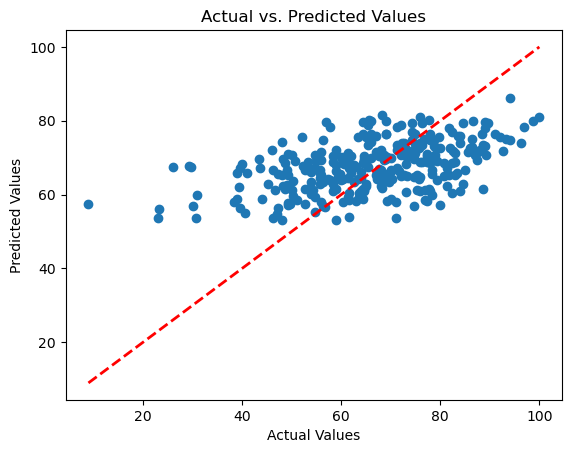

In [21]:
# Predict on our Test set
y_pred = reg.predict(X_test)

# Plotting our predictions against the actual values
# If the scatter plot shows a linear line, our model is accurate
# If the points are scattered around the axes, our model is innacurate
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot an accurate line of where we want our points to lie on
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

plt.show()

In [23]:
# Model performance quite poorly
# This could be attributed to poor data preparation?
# It could also be due to the dataset
reg.score(X_test, y_test)

0.23396558178298477